# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Everything was ok until our co...
1,Not Verified | My initial flight was cancelle...
2,Not Verified | We will never fly British Airw...
3,✅ Trip Verified | Check in and security cleara...
4,Not Verified | British Airways has confirmed ...


In [5]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Data Cleaning

In [6]:
# import libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import gensim
from gensim import corpora
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
# read dataset for cleaning purposes
df = pd.read_csv('BA_reviews.csv')
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,reviews
0,0,Not Verified | Everything was ok until our co...
1,1,Not Verified | My initial flight was cancelle...
2,2,Not Verified | We will never fly British Airw...
3,3,✅ Trip Verified | Check in and security cleara...
4,4,Not Verified | British Airways has confirmed ...


In [8]:
# remove Trip Verified, Not Verified and other things that isn't needed
df['reviews'] = df['reviews'].str.strip()
df['reviews']=df['reviews'].str.lstrip('✅ Trip Verified |')
df['reviews']=df['reviews'].str.lstrip('Not Verified |')
df['reviews']= df['reviews'].str.lower()
df1 = df.reviews
df1.head()

0    everything was ok until our connecting flight ...
1    my initial flight was cancelled 8 hours prior ...
2    we will never fly british airways again. our f...
3    check in and security clearance very quick at ...
4    british airways has confirmed itself as the wo...
Name: reviews, dtype: object

In [9]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Sentiments Analysis

Sentiment
Positive    646
Negative    343
Neutral      11
Name: count, dtype: int64


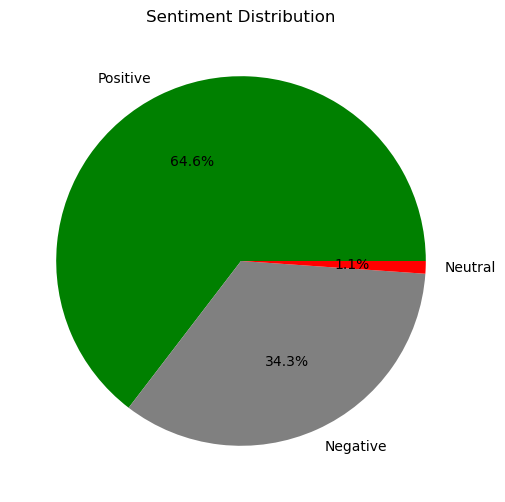

In [10]:
# define a function to sort sentiments.
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# create a sentiment column in dataframe
df['Sentiment'] = df['reviews'].apply(analyze_sentiment)

# Calculate sentiment distribution
sentiment_distribution = df['Sentiment'].value_counts()
print(sentiment_distribution)

# Plot sentiment distribution - pie chart
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

### Word Cloud

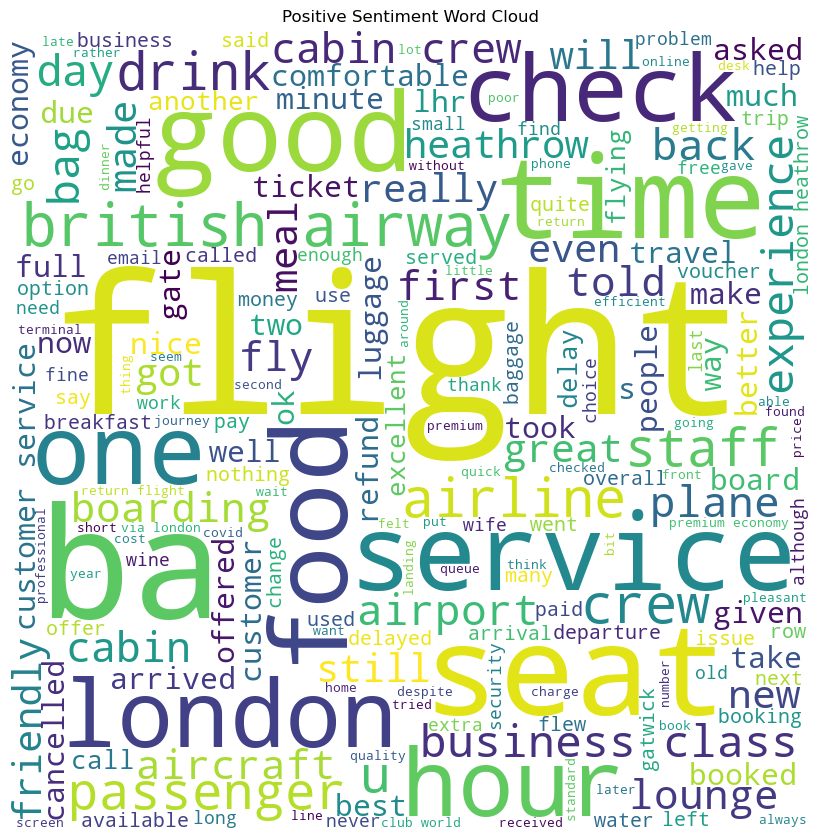

In [11]:
# Generate word clouds for each sentiment
def generate_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment'] == sentiment]['reviews'])
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"{sentiment} Sentiment Word Cloud")
    plt.show()

# Generate word clouds for each sentiment category
generate_wordcloud('Positive')


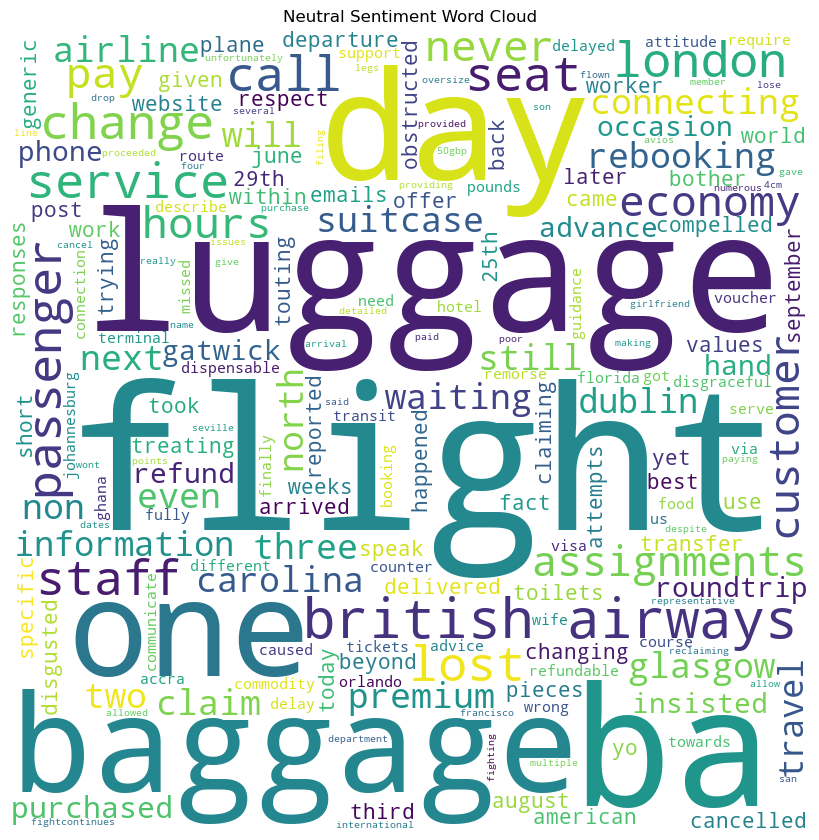

In [12]:
# word cloud for neutral sentiments
generate_wordcloud('Neutral')

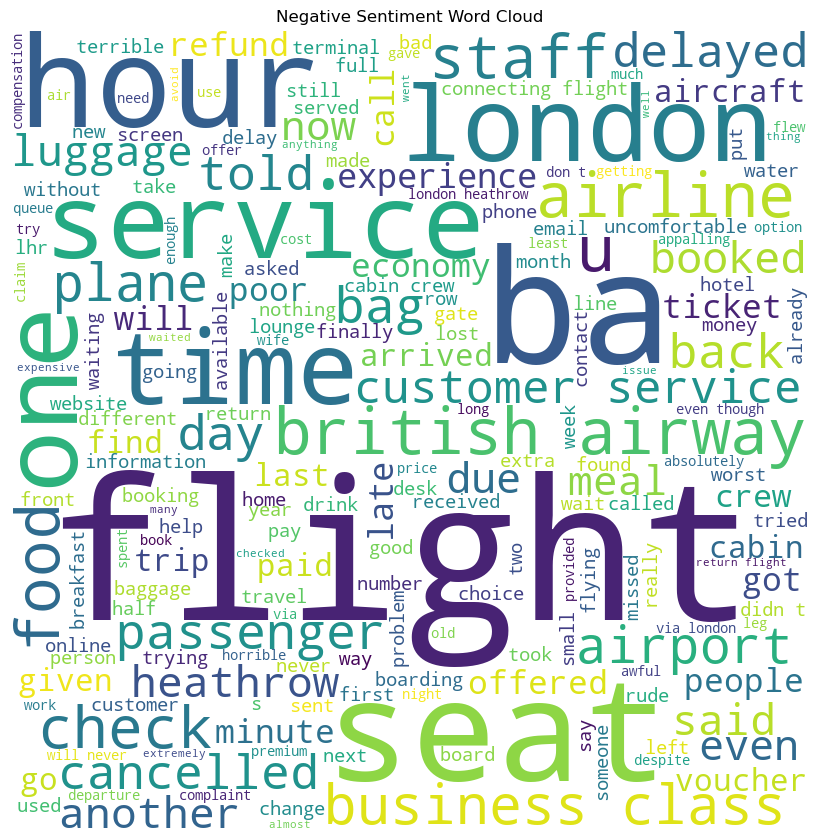

In [13]:
# word cloud for negative sentiments
generate_wordcloud('Negative')

In [19]:
# create a new dataset made up of negative reviews
df_negative = df[df['Sentiment']=='Negative']
df_negative

,Unnamed: 0,reviews,Sentiment
0,0,british airways has confirmed itself as the wo...,Negative
4,4,"flight cancelled, no crew! 9th september 2023,...",Negative
5,5,"the worst service ever, my baggage did not arr...",Negative
6,6,4/4 flights we booked this holiday were delaye...,Negative
7,7,british airways has a total lack of respect fo...,Negative
...,...,...,...
989,989,manchester to london. the bag drop process too...,Negative
991,991,london heathrow to stuttgart. absolutely disgu...,Negative
993,993,having booked ba business class and paid extra...,Negative
996,996,basel to san fransisco via heathrow. i'm convi...,Negative


In [21]:
df_positive = df[df['Sentiment']=='Positive']
df_positive

,Unnamed: 0,reviews,Sentiment
1,1,worst ba experience. i was supposed to fly out...,Positive
2,2,my daughter and i were denied boarding on our ...,Positive
3,3,despite boarding being the usual free for all ...,Positive
8,8,"london heathrow to keflavik, iceland in busine...",Positive
9,9,mumbai to london heathrow in business class on...,Positive
...,...,...,...
992,992,london to johannesburg. turning right to the f...,Positive
994,994,ancouver to london heathrow. i chose to fly wi...,Positive
995,995,boston to nairobi via london. the only good th...,Positive
998,998,london to boston. i was seated next to a custo...,Positive


In [22]:
# Import necessary libraries
import gensim
from gensim import corpora
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('omw-1.4')

# Extract reviews from the dataset (assuming 'reviews' is the column name)
reviews = df_positive['reviews'].tolist()

# Preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Preprocess the reviews
processed_reviews = [preprocess(review) for review in reviews]

# Create a dictionary from the processed reviews
dictionary = corpora.Dictionary(processed_reviews)

# Create a document-term matrix (bag of words)
doc_term_matrix = [dictionary.doc2bow(review) for review in processed_reviews]

# Create an LDA model
lda_model = gensim.models.LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=5,  # Adjust the number of topics as needed
    random_state=42,
    passes=10,      # Number of passes over the dataset
    iterations=100, # Maximum number of iterations for each topic
)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.045*"wa" + 0.030*"flight" + 0.013*"ba" + 0.013*"seat" + 0.009*"service"')
(1, '0.023*"wa" + 0.013*"flight" + 0.009*"ba" + 0.009*"airline" + 0.007*"u"')
(2, '0.042*"wa" + 0.030*"flight" + 0.013*"ba" + 0.011*"good" + 0.011*"time"')
(3, '0.034*"wa" + 0.015*"ba" + 0.015*"flight" + 0.013*"seat" + 0.012*"service"')
(4, '0.042*"wa" + 0.021*"flight" + 0.017*"ba" + 0.010*"good" + 0.008*"service"')


In [15]:
# Initialize a list to store the topic frequencies
topic_frequencies = [0] * lda_model.num_topics

# Iterate through each document and update topic frequencies
for doc_bow in doc_term_matrix:
    doc_topics = lda_model.get_document_topics(doc_bow)
    for topic, prob in doc_topics:
        topic_frequencies[topic] += 1

# Print the topic frequencies
for topic, frequency in enumerate(topic_frequencies):
    print(f"Topic {topic}: {frequency} documents")


Topic 0: 201 documents
Topic 1: 48 documents
Topic 2: 69 documents
Topic 3: 182 documents
Topic 4: 45 documents


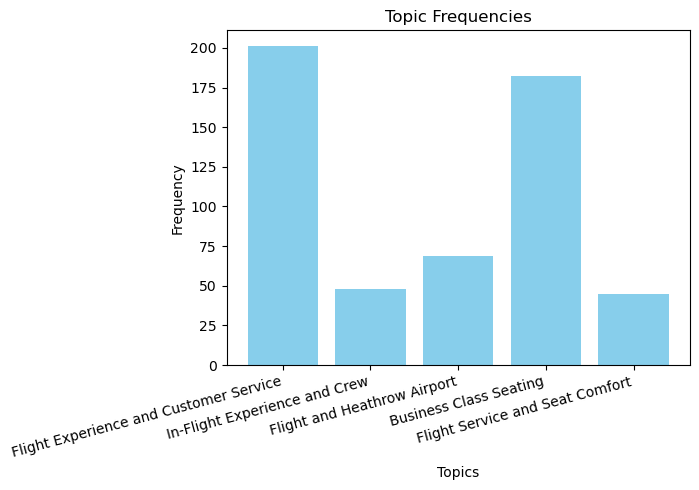

In [18]:
import matplotlib.pyplot as plt

# Assign topic names based on interpretation
topic_names = {
    0: "Flight Experience and Customer Service",
    1: "In-Flight Experience and Crew",
    2: "Flight and Heathrow Airport",
    3: "Business Class Seating",
    4: "Flight Service and Seat Comfort",
}

# Initialize a list to store the topic frequencies
topic_frequencies = [0] * len(topic_names)

# Iterate through each document and update topic frequencies
for doc_bow in doc_term_matrix:
    doc_topics = lda_model.get_document_topics(doc_bow)
    for topic, prob in doc_topics:
        topic_frequencies[topic] += 1

# Create a bar chart to visualize topic frequencies
plt.figure(figsize=(7, 5))
plt.bar(topic_names.values(), topic_frequencies, color='skyblue')
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Topic Frequencies')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()


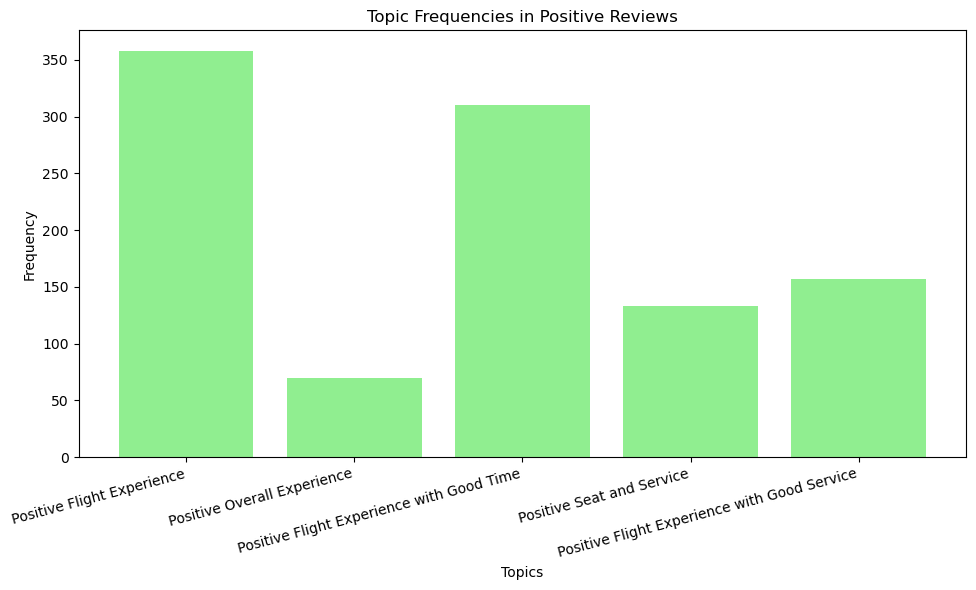

In [23]:
import matplotlib.pyplot as plt

# Assign topic names based on interpretation
topic_names_positive = {
    0: "Positive Flight Experience",
    1: "Positive Overall Experience",
    2: "Positive Flight Experience with Good Time",
    3: "Positive Seat and Service",
    4: "Positive Flight Experience with Good Service",
}

# Initialize a list to store the topic frequencies for positive reviews
topic_frequencies_positive = [0] * len(topic_names_positive)

# Iterate through each document and update topic frequencies for positive reviews
for doc_bow in doc_term_matrix:
    doc_topics = lda_model.get_document_topics(doc_bow)
    for topic, prob in doc_topics:
        topic_frequencies_positive[topic] += 1

# Create a bar chart to visualize topic frequencies for positive reviews
plt.figure(figsize=(10, 6))
plt.bar(topic_names_positive.values(), topic_frequencies_positive, color='lightgreen')
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.title('Topic Frequencies in Positive Reviews')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()
